In [1]:
%load_ext autoreload
%autoreload 2

In [196]:
from wdtools import *

In [3]:
setID = 'Set001'; nm_to_add=0

In [4]:
setgdf = gpd.read_file(os.path.join(inpath, 'GIS', 'Join_Statewide.gdb'), layer=f'WD_{setID}_Combined')

In [9]:
setgdf.columns

Index(['Record_ID', 'wetdet_delin_number', 'trsqq', 'parcel_id',
       'address_location_desc', 'city', 'county', 'site_name', 'site_desc',
       'latitude', 'longitude', 'Coord_Source', 'DocumentName', 'DecisionLink',
       'is_batch_file', 'status_name', 'received_date', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'lot_num', 'lot',
       'Match_Year', 'ORTAXLOT', 'Match_found', 'Manual_note', 'Shape_Length',
       'Shape_Area', 'Edits_Complete', 'matcher2', 'geometry'],
      dtype='object')

In [5]:
wd = combine_wd_tables(setID=setID, nm_to_add=nm_to_add)

In [6]:
matched = gpd.read_file(os.path.join(inpath + '\\output\\matched\\', f'matched_records_{setID}_edited.shp'))

In [7]:
unmatched = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_2.csv'))

In [8]:
matched.columns

Index(['wdID', 'trsqq', 'parcel_id', 'notes', 'lots', 'lot', 'ORTaxlot',
       'record_ID', 'geometry'],
      dtype='object')

In [184]:
outpath = r'L:\NaturalResources\Wetlands\Local Wetland Inventory\WAPO\EPA_2022_Tasks\Task 1 WD Mapping\output'
partial = pd.read_csv(outpath + f'\\to_review\\partial_matched_{setID}.csv')

In [185]:
partial.shape

(497, 25)

In [208]:
wdID = 'WD2018-0497'

In [209]:
wdID in setgdf.wetdet_delin_number.unique()

False

<AxesSubplot:>

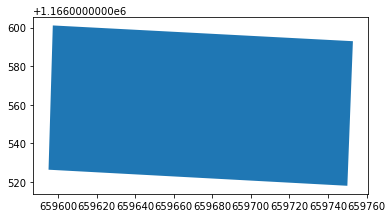

In [177]:
setgdf[setgdf.wetdet_delin_number == wdID].plot()

In [178]:
wdID in matched.wdID.unique()

False

In [153]:
setgdf[setgdf.wetdet_delin_number == wdID]

,Record_ID,wetdet_delin_number,trsqq,parcel_id,address_location_desc,city,county,site_name,site_desc,latitude,...,lot,Match_Year,ORTAXLOT,Match_found,Manual_note,Shape_Length,Shape_Area,Edits_Complete,matcher2,geometry
754,806.0,WD2019-0124,36S02W20,1700p,OR140 E of I-5 at Exit 35 to intersection with...,Central Point,Jackson,OR140: Exit 35 to Blackwell Rd,WD2019-0124 Highway Improvement,42.41958,...,1700.0,2019.0,None,1.0,partial,347.981161,3430.575580,1.0,806lot1,"MULTIPOLYGON (((648767.153 254227.990, 648774...."
879,808.0,WD2019-0124,36S02W21,"1204,1300,1301,1302,1303,ROW,All part",OR140 E of I-5 at Exit 35 to intersection with...,Central Point,Jackson,OR140: Exit 35 to Blackwell Rd,WD2019-0124 Highway Improvement,42.41958,...,1204.0,2019.0,None,1.0,ROW & partial,5143.087453,763430.973534,1.0,808lot1,"MULTIPOLYGON (((648622.195 254668.958, 648903...."
1992,807.0,WD2019-0124,36S02W28,"Many,ROW,All part",OR140 E of I-5 at Exit 35 to intersection with...,Central Point,Jackson,OR140: Exit 35 to Blackwell Rd,WD2019-0124 Highway Improvement,42.41958,...,1204.0,2019.0,None,1.0,ROW & partial,9254.570319,843547.213428,1.0,807lot1,"MULTIPOLYGON (((650078.433 253067.239, 650129...."


In [15]:
mapped_list = []

In [16]:
wdID

'WD2020-0391'

In [154]:
mapped_list.append(wdID)

In [191]:
mapped_list

['WD2020-0391',
 'WD2021-0559',
 'WD2020-0067',
 'WD2021-0162',
 'WD2018-0217',
 'WD2019-0431',
 'WD2018-0419',
 'WD2019-0338',
 'WD2020-0536',
 'WD2018-0306',
 'WD2017-0347',
 'WD2018-0386',
 'WD2018-0522',
 'WD2019-0231',
 'WD2018-0124',
 'WD2020-0668',
 'WD2021-0703',
 'WD2018-0657',
 'WD2019-0124']

In [182]:
len(mapped_list)

19

In [26]:
get_point_from_lonlat(lon=-121.275737, lat=44.022318)

,Longitude,Latitude,geometry
0,-121.275737,44.022318,POINT (1108331.617 829246.711)


In [23]:
# mapped in this work
added_list = []

In [174]:
added_list.append(wdID)

In [183]:
added_list

['WD2022-0024',
 'WD2021-0310',
 'WD2021-0529',
 'WD2022-0261',
 'WD2018-0281',
 'WD2021-0180']

In [88]:
review_list = []

In [179]:
review_list.append(wdID)

In [180]:
review_list

['WD2022-0291',
 'WD2022-0087',
 'WD2019-0179',
 'WD2019-0259',
 'WD2022-0142',
 'WD2018-0408']

In [187]:
unmatchedwdIDs = unmatched.wetdet_delin_number.unique()

In [188]:
IDstoCheck = [wdID for wdID in partial.wetdet_delin_number.unique() if wdID not in unmatchedwdIDs]

In [190]:
[wdID for wdID in mapped_list if wdID in IDstoCheck]

[]

In [199]:
lsts = [mapped_list, added_list, review_list]

In [202]:
lstnms = ['mapped', 'toMap', 'toReview']

In [207]:
for lstnm in lstnms:
    writelist(lst=lsts[lstnms.index(lstnm)], lstnm=lstnm, setID=setID) 